In [ ]:
"""
Load “lesson2-exercise-data2.csv” and perform clustering with k-means of non-hierarchical clustering. 
Change the number of clusters from 2 to 10, calculate the silhouette coefficient for each, and
Draw a graph of the number of stars and silhouette coefficient. 
Perform principal component analysis, visualize as a two-dimensional scatter plot using up to the second principal component, 
and paint points by the number of clusters with the highest silhouette coefficient.
"""

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
import pandas as pd

path = os.getcwd()

df = pd.read_csv(path+"/temp/sampleData3.csv")

In [13]:
clusterNum = 3
res = KMeans(n_clusters=clusterNum, init='k-means++').fit_predict(df)
df["cluster"] = res 
df

for i in range(clusterNum): 
    plt.scatter(df[df["cluster"]==i]["X"],df[df["cluster"]==i]["Y"],label="c"+str(i))
plt.legend()

ValueError: could not convert string to float: 'B'

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
sc = StandardScaler()
df1 = pd.DataFrame(sc.fit_transform(df))
df1.columns = df.columns

In [8]:
display(df.head())
display(df1.head())

,X,Y,cluster
0,2.825029,1.356348,0
1,0.354820,2.917230,1
2,0.732732,4.413232,1
3,0.349443,4.574619,1
4,2.843913,0.141712,0


,X,Y,cluster
0,1.403318,-0.907994,-1.224745
1,-0.058902,0.100416,0.000000
2,0.164799,1.066911,0.000000
3,-0.062085,1.171175,0.000000
4,1.414496,-1.692712,-1.224745


In [10]:
pca = PCA()
pca.fit(df1)
print(pca.components_)
print(pca.explained_variance_ratio_)

[[-0.61203691  0.44890207  0.65107431]
 [ 0.44423319  0.87626931 -0.18657163]
 [ 0.65426882 -0.1750401   0.73572636]]
[0.73026506 0.24133047 0.02840447]


<BarContainer object of 3 artists>

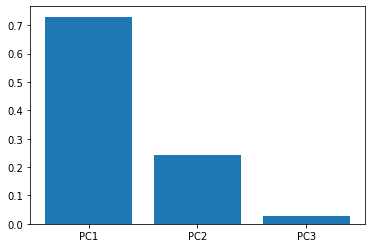

In [11]:
labelList = ["PC" + str(i+1) for i in range(len(pca.explained_variance_ratio_))]
plt.bar(labelList, pca.explained_variance_ratio_)